# **Author :**
# **Kartik Dalal**

- 🔗 LinkedIn - https://www.linkedin.com/in/kartik-dalal-642a42320/

- 📺 Medium  -  https://medium.com/@dalalkartik077

-    Github -  https://github.com/kartikdalal19

# **Project Name**    - Online Retail (Clustering) Project



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -  Kartik Dalal**

# **Project Summary -**

This project aims to segment customers based on their purchasing patterns using unsupervised machine learning, specifically KMeans and Agglomerative Clustering, on an e-commerce dataset from a UK-based retailer.

The dataset includes over 400,000 transaction records with customer-level attributes like:

- InvoiceNo and InvoiceDate

- StockCode and Description

- Quantity and UnitPrice

- CustomerID

- Country

Engineered key features such as:

- TotalPrice per customer (Quantity × UnitPrice)

- OrderFrequency (number of purchases per customer)

- TF-IDF vectorization of product descriptions to capture customer product preferences

- One-hot encoded country information

To prepare the data:

- Performed text preprocessing, TF-IDF feature extraction, and scaling (using StandardScaler/RobustScaler) of numeric attributes.

Dimensionality was reduced using PCA for visualization and interpretability.

Two clustering models were trained:

- KMeans with a silhouette score of 0.80

- Agglomerative Clustering with a higher silhouette score of 0.83

The Agglomerative Clustering model was chosen for its superior silhouette score and better-defined cluster separations.

💡 Business Impact:
- Customer Segmentation: The model divided customers into four distinct groups based on behavior and spend.

- Targeted Marketing: Marketing teams can now create customized campaigns for high-spending vs. low-frequency customers.

- Personalization: The TF-IDF features help recommend relevant products to specific clusters.

- Profit Optimization: By focusing on valuable segments, the business can reduce churn and increase ROI.

- This solution provides the company with a scalable, data-driven approach to understanding customer behavior, improving retention, and driving personalized growth strategies.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The business lacks a data-driven strategy to differentiate customers based on their purchasing behavior. Without proper segmentation, all customers are treated the same, leading to inefficient marketing spend, poor personalization, and lost revenue opportunities.

This project aims to:

Segment customers into distinct behavioral groups using clustering algorithms.

Use these segments to enable personalized marketing, better product recommendations, and strategic decision-making for business growth.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
# !pip install openpyxl

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_SETS/Copy of Online Retail.xlsx - Online Retail.csv')

### Dataset First View

In [ ]:
# Dataset First Look

data =df.copy()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

data.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

data.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

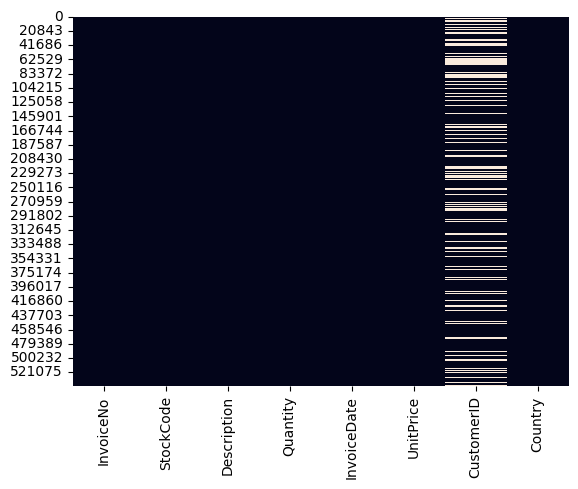

In [ ]:
# Visualizing the missing values

sns.heatmap(data.isnull(),cbar = False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe

data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in data.columns:
  print(f'The number of unique values in {i} is {data[i].nunique()} ')

The number of unique values in InvoiceNo is 25900 
The number of unique values in StockCode is 4070 
The number of unique values in Description is 4223 
The number of unique values in Quantity is 722 
The number of unique values in InvoiceDate is 23260 
The number of unique values in UnitPrice is 1630 
The number of unique values in CustomerID is 4372 
The number of unique values in Country is 38 


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# data = data.drop(['CustomerID'], axis=1)
data = data.dropna(subset=['CustomerID'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
data = data.drop_duplicates()

In [ ]:
data['Description'] = data['Description'].fillna('unknown')

/tmp/ipython-input-82-3023828444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].fillna('unknown')


In [ ]:
# Count how many items are in each invoice
freq_of_orders = data['InvoiceNo'].value_counts().to_dict()

# Add a new column with frequency of that invoice
data['OrderFrequency'] = data['InvoiceNo'].map(freq_of_orders)


In [ ]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       401604 non-null  object 
 1   StockCode       401604 non-null  object 
 2   Description     401604 non-null  object 
 3   Quantity        401604 non-null  int64  
 4   InvoiceDate     401604 non-null  object 
 5   UnitPrice       401604 non-null  float64
 6   CustomerID      401604 non-null  float64
 7   Country         401604 non-null  object 
 8   OrderFrequency  401604 non-null  int64  
 9   TotalPrice      401604 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 33.7+ MB


In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
OrderFrequency,0
TotalPrice,0


In [ ]:
data.duplicated().sum()

np.int64(0)

### What all manipulations have you done and insights you found?

- Created new features like
  
  1. TotalPrice
  2. OrderFrequency

- Removed the duplicated values.

- Filled the missing values in Description with 'Unkown'

- Removed the customerID with missing values

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

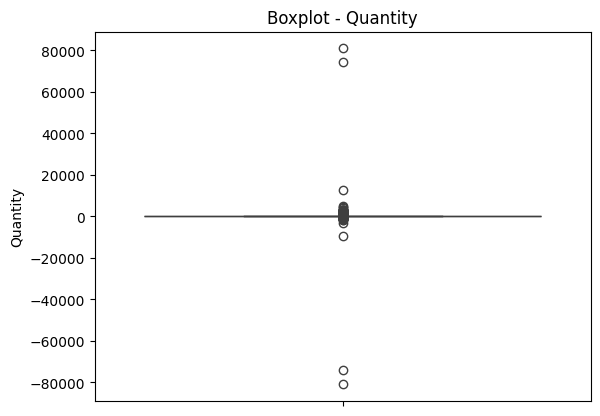

In [ ]:
# checking for the outlier using boxplot

sns.boxplot(data['Quantity'])
plt.title("Boxplot - Quantity")
plt.show()


##### 1. Why did you pick the specific chart?

Detects outliers (e.g., high spenders)

Shows data spread (min, Q1, median, Q3, max

##### 2. What is/are the insight(s) found from the chart?

From the graph we can see:
-  the outliers around 80000
- quantity is in negative which is not possible (erroneous data)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer Segmentation:
Clustering customers based on purchase behavior (Total Spend, Frequency, TF-IDF on product preferences) helps in targeted marketing, personalized promotions, and loyalty programs, improving customer retention and satisfaction.

#### Chart - 2

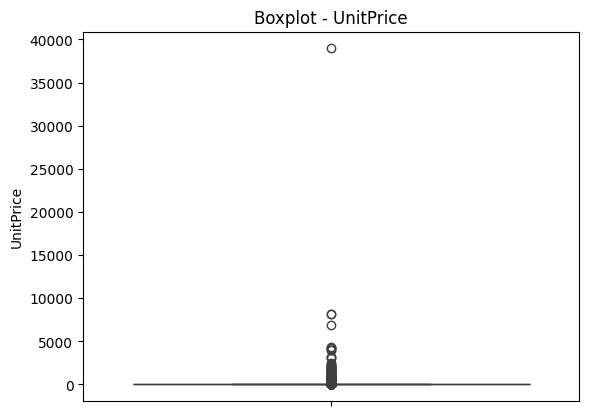

In [ ]:
# Chart - 2 visualization code

sns.boxplot(data['UnitPrice'])
plt.title("Boxplot - UnitPrice")
plt.show()


##### 1. Why did you pick the specific chart?

Detects outliers (e.g., high spenders)

Shows data spread (min, Q1, median, Q3, max

##### 2. What is/are the insight(s) found from the chart?

- Many Outliers: Numerous high-value UnitPrice outliers exist.

- Heavily Right-Skewed: Most UnitPrice values are very low (near zero), indicating a distribution concentrated at the lower end.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#####Positive Impact:

- Targeted Strategies: Differentiate between high-volume, low-price items (mass market) and low-volume, high-price items (premium segment/niche). This allows for optimized pricing, marketing, and inventory for each.

- Revenue Growth: High-value outliers are likely significant profit contributors; understanding them can boost overall revenue.

- Fraud/Error Detection: High outliers can signal data issues or fraud, preventing losses.

##### Negative Growth

(if insights are ignored/mismanaged):

- Misguided Strategy: Ignoring the skewed distribution and high outliers could lead to inappropriate pricing (e.g., overpricing common items, underpricing premium ones) or misdirected marketing.

#### Chart - 3

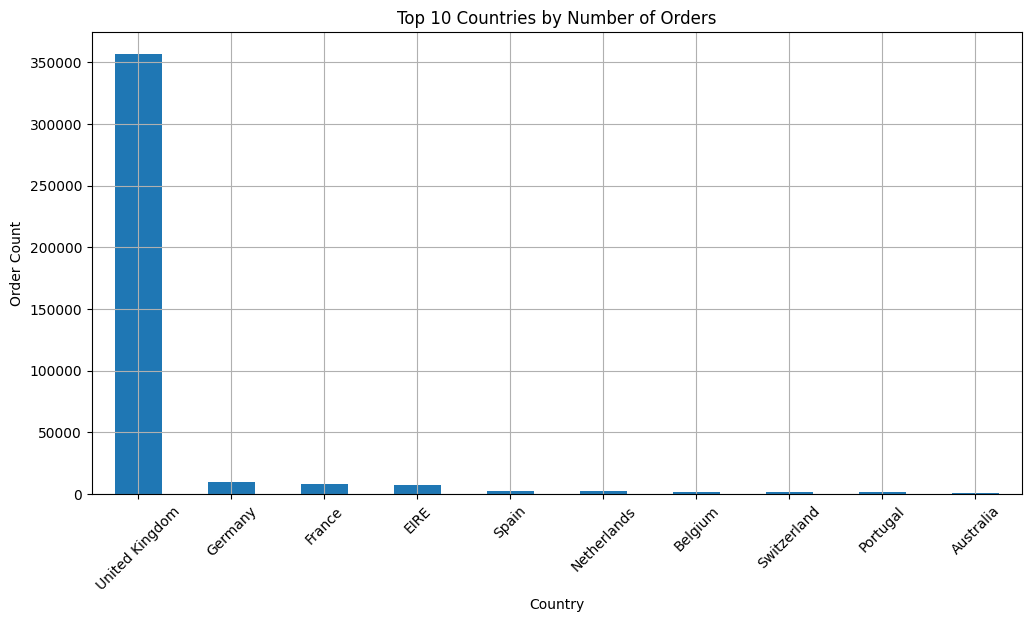

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
data['Country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries by Number of Orders")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Bar graphs are used to:

Compare Categorical Data:
Ideal for comparing quantities across different categories (e.g., countries, products, customer segments).

Show Frequency or Count:
Helps visualize how many times a category appears (e.g., top 10 selling products).

##### 2. What is/are the insight(s) found from the chart?

- Dominance of United Kingdom (UK): The UK accounts for an overwhelmingly large number of orders (over 350,000), dwarfing all other countries.

- Steep Drop-off: There's a drastic drop in order count after the UK, with Germany, France, and EIRE having significantly fewer orders (around 5,000-10,000 each).

- Long Tail of Minor Contributors: The remaining countries (Spain, Netherlands, Belgium, Switzerland, Portugal, Australia) contribute very few orders, mostly under 5,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Impact:

- Resource Allocation: Focus primary marketing, sales, and logistical efforts on the UK for maximum return on investment.

- Market Expansion Prioritization: Identify next-tier countries (Germany, France, EIRE) for targeted, but less intensive, growth strategies.

- Tailored Strategies: Develop specific, localized strategies for each tier of countries based on their order volume.

Negative Growth (if insights are ignored/mismanaged):

- Misallocation of Resources: Over-investing heavily in low-order countries while neglecting the dominant UK market could dilute efforts and reduce overall growth.

#### Chart - 4

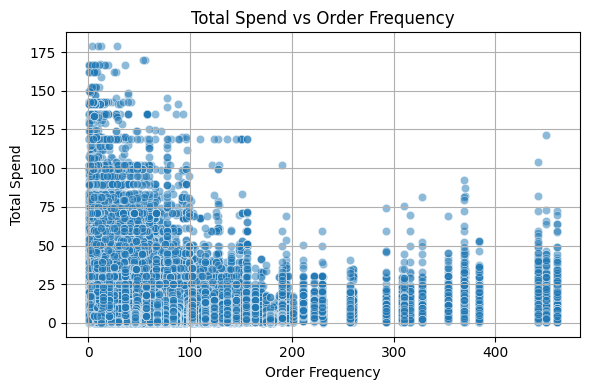

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for TotalPrice < 30000
filtered_data = data[data['TotalPrice'] < 30000]
filtered_data = data[data['TotalPrice'] > 0]


# Create the scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='OrderFrequency', y='TotalPrice', data=filtered_data, alpha=0.5)
plt.title("Total Spend vs Order Frequency")
plt.grid(True)
plt.xlabel("Order Frequency")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Scatter plots are used to:

Visualize Relationships Between Two Variables
→ Example: TotalPrice vs OrderFrequency shows if more frequent orders lead to higher spending.

Identify Patterns or Trends
→ Helps spot correlations (positive, negative, or none).

Detect Outliers
→ Points far from others indicate unusual or erroneous data.

##### 2. What is/are the insight(s) found from the chart?

- Dense Cluster at Low Values: The vast majority of customers have low order frequency (0-150) and low total spend (0-75).

- Declining Density with Higher Frequency/Spend: As order frequency and total spend increase, the density of customers rapidly decreases.

- High-Frequency, Low-Spend Customers: There are customers with very high order frequency (up to 450+) but relatively low total spend (typically below 75, sometimes up to 125).

- Low-Frequency, High-Spend Customers: Conversely, some customers have low order frequency but higher total spend (up to 180+), mainly in the 0-50 order frequency range.

- No High-Frequency, High-Spend Customers: There are very few (if any) customers who simultaneously have both very high order frequency and very high total spend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- Customer Segmentation: Identify different customer groups: "High-Volume Buyers" (low spend, high frequency), "High-Value Buyers" (high spend, low frequency), and "Regular Customers" (low spend, low frequency).

- Tailored Marketing: Design specific campaigns for each segment (e.g., loyalty programs for high-frequency, product recommendations for high-spend, re-engagement for low-frequency/low-spend).

- Retention Focus: Understand the needs of high-frequency, low-spend customers to retain their volume, and high-spend, low-frequency customers to encourage more purchases.

Negative Growth (if insights are ignored/mismanaged):

- Generic Strategies: Treating all customers the same will lead to inefficient marketing spend and missed opportunities for targeted engagement.



#### Chart - 5

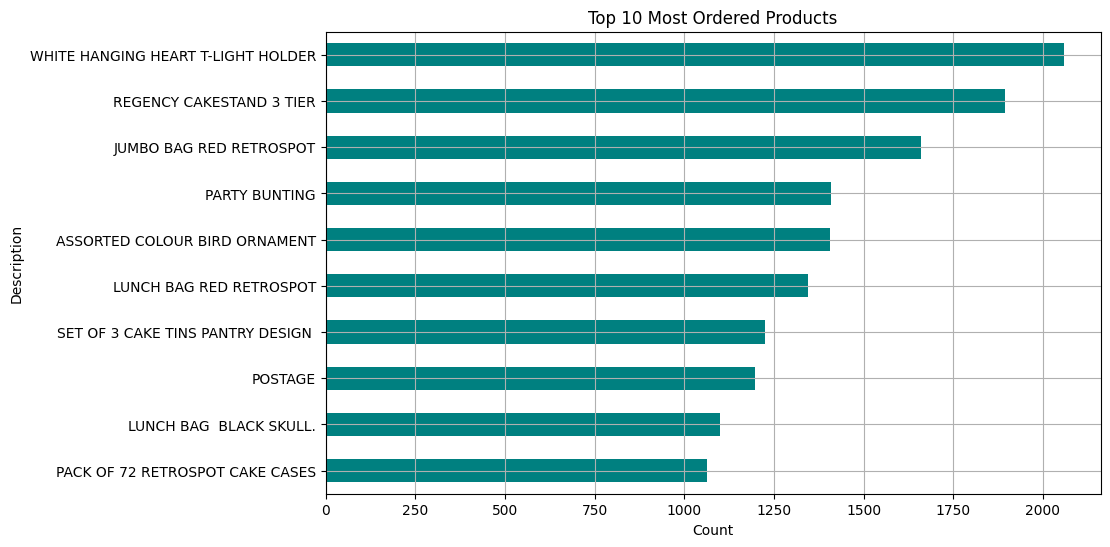

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
data['Description'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Bar graphs are used to:

Compare Categorical Data: Ideal for comparing quantities across different categories (e.g., countries, products, customer segments).

Show Frequency or Count: Helps visualize how many times a category appears (e.g., top 10 selling products).

##### 2. What is/are the insight(s) found from the chart?

- Top Performers: "WHITE HANGING HEART T-LIGHT HOLDER" and "REGENCY CAKESTAND 3 TIER" are significantly more ordered than others (2000+ and ~1900 counts respectively).

- Tiered Popularity: There's a clear drop-off after the top two, with the next few items in the 1200-1700 range, and the bottom items around 1000-1100.

- Diverse Product Types: The list includes various items like decor (t-light holder), kitchenware (cakestand, cake tins), bags (jumbo bag, lunch bags), and party supplies (bunting). "POSTAGE" being listed suggests it's handled as a product or item for order count purposes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- Inventory & Supply Chain: Prioritize stock levels and ensure robust supply for top-ordered items to prevent stockouts and maximize sales.

- Marketing & Promotions: Feature best-selling products prominently in marketing campaigns, bundles, or special offers to attract more customers.

- Product Development: Analyze what makes top products popular (e.g., design, utility, price point) to inform future product development.

Negative Growth (if insights are ignored/mismanaged):

- Lost Sales: Understocking popular items leads directly to lost sales and customer dissatisfaction.

#### Chart - 6

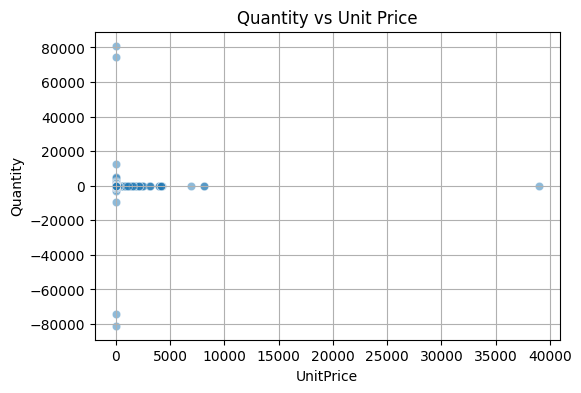

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='UnitPrice', y='Quantity', alpha=0.5)
plt.title("Quantity vs Unit Price")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots are used to:

Visualize Relationships Between Two Variables → Example: TotalPrice vs OrderFrequency shows if more frequent orders lead to higher spending.

Identify Patterns or Trends → Helps spot correlations (positive, negative, or none).

Detect Outliers → Points far from others indicate unusual or erroneous data.

##### 2. What is/are the insight(s) found from the chart?

- Dense Cluster at Low Values: Most transactions involve low quantities (near 0) and low unit prices (near 0).

- Outliers in Quantity: There are significant outliers with very high positive and negative quantities (up to ± 80,000), primarily at very low unit prices.

- Outliers in Unit Price: One significant outlier exists at a very high unit price (around 38,000) but with a quantity near zero.

- Negative Quantities: The presence of negative quantities suggests returns, cancellations, or credit adjustments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- Identify Returns/Adjustments: The negative quantities provide direct insight into returns/cancellations, crucial for understanding net sales and customer satisfaction.

- High-Volume/Low-Price Products: The dense cluster indicates a core business in high-volume, low-price items, informing inventory and marketing.

- High-Value Transactions: The single high-unit-price outlier represents a very expensive item/transaction, requiring specific attention for its potential profit contribution.

Negative Growth (if insights are ignored/mismanaged):

- Profit Leakage: Unmanaged negative quantities (returns/cancellations) can erode profitability if root causes aren't addressed.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

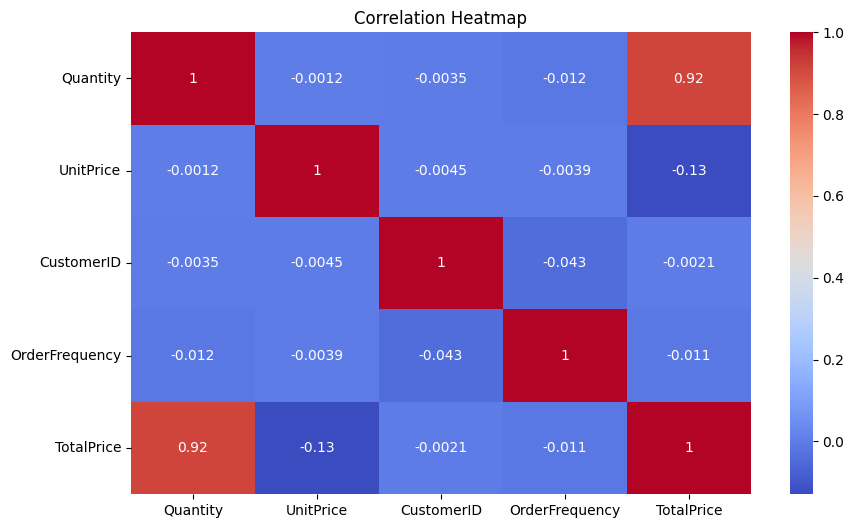

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# # Pair Plot visualization code


# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select numeric columns for pairplot
# numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice', 'OrderFrequency']

# # Filter only rows with no nulls in those columns
# plot_data = data[numeric_cols].dropna()

# # Create the pairplot
# sns.pairplot(plot_data)
# plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
# plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
OrderFrequency,0
TotalPrice,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

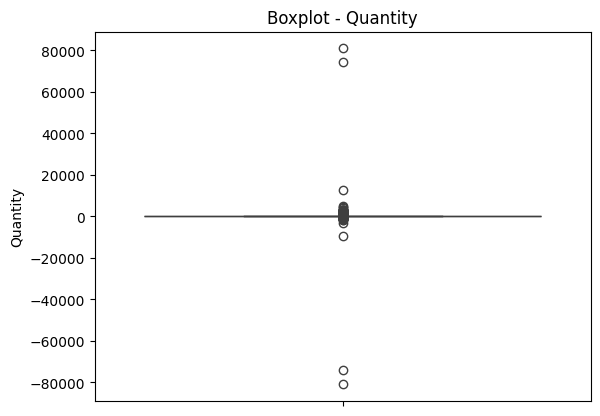

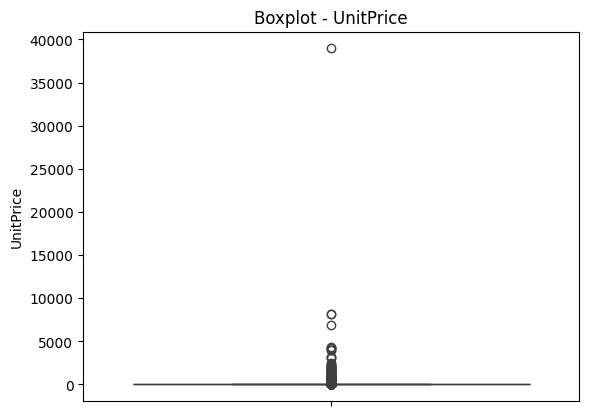

In [ ]:
# checking for the outlier using boxplot

sns.boxplot(data['Quantity'])
plt.title("Boxplot - Quantity")
plt.show()

sns.boxplot(data['UnitPrice'])
plt.title("Boxplot - UnitPrice")
plt.show()


In [ ]:
import pandas as pd

# STEP 1: Remove invalid or nonsensical values
# --------------------------------------------
# Remove negative or zero Quantity and UnitPrice
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
# Set a max quantity threshold (e.g., 10,000 units)
max_quantity_threshold = 10000
data = data[data['Quantity'] <= max_quantity_threshold]

# STEP 2: Remove outliers using IQR method
# ----------------------------------------
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to Quantity and UnitPrice
data = remove_outliers_iqr(data, 'Quantity')
data = remove_outliers_iqr(data, 'UnitPrice')



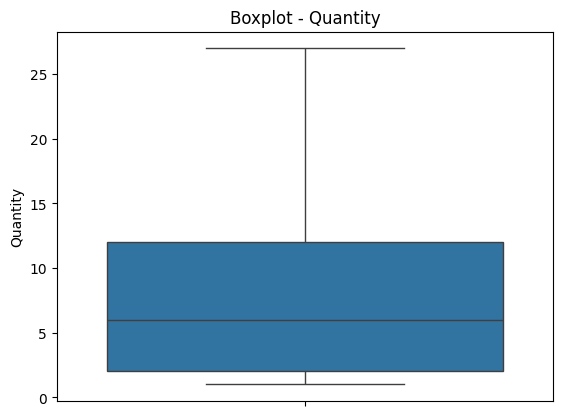

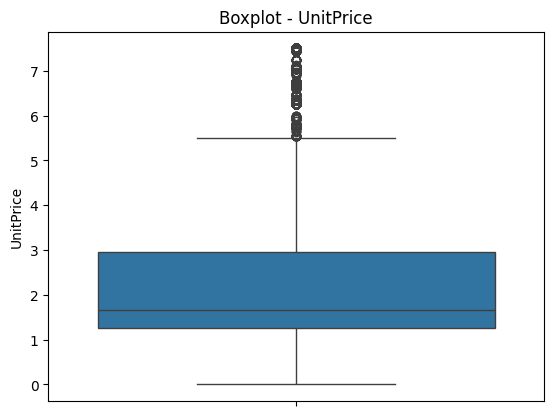

In [ ]:
# checking for the outlier using boxplot

sns.boxplot(data['Quantity'])
plt.title("Boxplot - Quantity")
plt.show()

sns.boxplot(data['UnitPrice'])
plt.title("Boxplot - UnitPrice")
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### 2. Lower Casing

In [ ]:
# Lower Casing

data['Description'] = data['Description'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

data['Description'] = data['Description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]','',x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
data['Description'] = data['Description'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
stop = stopwords.words('english')
data['Description'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Remove White spaces
data['Description'] = data['Description'].apply(lambda x: x.strip())



```
# This is formatted as code
```

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

data['Description'] = data['Description'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download required resources
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Ensure all entries in Description are strings
data['Description'] = data['Description'].astype(str)

# Apply lemmatization
data['Description'] = data['Description'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# # Vectorizing Text

# # Vectorizing Text
# tfidf = TfidfVectorizer(max_features=1000) # You can adjust max_features as needed
# tfidf_matrix = tfidf.fit_transform(data['Description']).toarray()
# tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
# #

# # Display the first few rows of the TF-IDF DataFrame
# print("TF-IDF Vectorized Descriptions:")
# display(tfidf_df.head())

In [ ]:
# tfidf_df.shape

NameError: name 'tfidf_df' is not defined

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

In [ ]:

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# (Optional) Preview result
print(f"Remaining rows after outlier handling: {data.shape[0]}")
data.describe()


Remaining rows after outlier handling: 333234


,Quantity,UnitPrice,CustomerID,OrderFrequency,TotalPrice
count,333234.000000,333234.000000,333234.000000,333234.000000,333234.000000
mean,7.550682,2.194218,15318.903614,50.955611,12.902273
std,6.777237,1.546015,1711.175915,58.462049,13.214967
min,1.000000,0.001000,12347.000000,1.000000,0.001000
25%,2.000000,1.250000,13988.000000,20.000000,3.900000
50%,6.000000,1.650000,15235.000000,35.000000,10.140000
75%,12.000000,2.950000,16814.000000,61.000000,17.400000
max,27.000000,7.500000,18287.000000,542.000000,178.800000


In [ ]:
data = pd.get_dummies(data, columns=['Country'], drop_first=True)


In [ ]:
# Count how many items are in each invoice
freq_of_orders = data['InvoiceNo'].value_counts().to_dict()

# Add a new column with frequency of that invoice
data['OrderFrequency'] = data['InvoiceNo'].map(freq_of_orders)


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

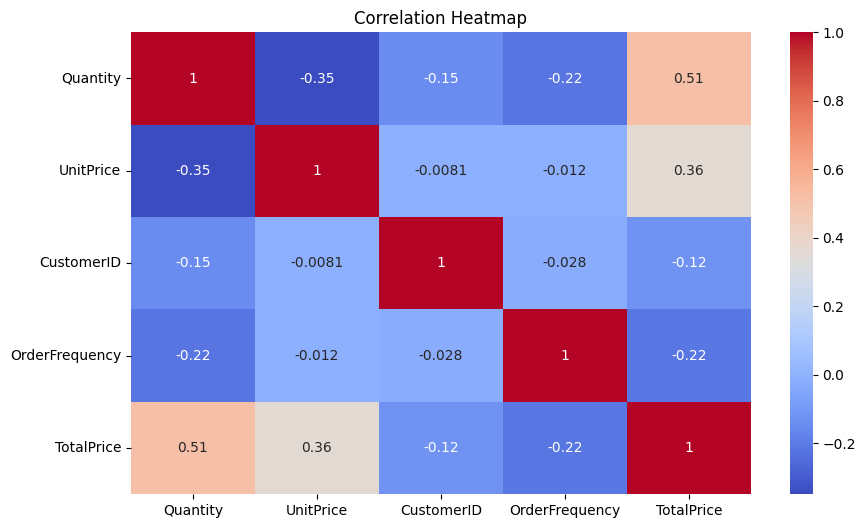

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'OrderFrequency', 'TotalPrice',
       'Country_Austria', 'Country_Bahrain', 'Country_Belgium',
       'Country_Brazil', 'Country_Canada', 'Country_Channel Islands',
       'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark',
       'Country_EIRE', 'Country_European Community', 'Country_Finland',
       'Country_France', 'Country_Germany', 'Country_Greece',
       'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan',
       'Country_Lebanon', 'Country_Lithuania', 'Country_Malta',
       'Country_Netherlands', 'Country_Norway', 'Country_Poland',
       'Country_Portugal', 'Country_RSA', 'Country_Saudi Arabia',
       'Country_Singapore', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_USA', 'Country_United Arab Emirates',
       'Country_United Kingdom', 'Country_Unspecified'],
      dtype='object')

In [ ]:
# # import pandas as pd
# # from sklearn.feature_extraction.text import TfidfVectorizer

# # # Step 1 : TF-IDF Vectorization
# # # Already done
# # # tfidf = TfidfVectorizer(max_features=1000)
# # # tfidf_matrix = tfidf.fit_transform(data['Description'].fillna("")).toarray()
# # # tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())


# # # Step 2: Combine with rest of features (drop text column)
# # other_features = data.drop(columns=['Description'])  # keep only numeric/categorical
# # final_df = pd.concat([other_features.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# # # Step 3: Final feature matrix
# # print("Final shape:", final_df.shape)
# # display(final_df.head())



# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Step 1: Group descriptions by CustomerID
# customer_description = data.groupby('CustomerID')['Description'].agg(lambda x: ' '.join(x)).reset_index()

# # Step 2: TF-IDF Vectorization
# tfidf = TfidfVectorizer()  # Optional: adjust as needed
# tfidf_matrix = tfidf.fit_transform(customer_description['Description']).toarray()
# tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
# tfidf_df['CustomerID'] = customer_description['CustomerID']

# # Step 3: Extract unique customer info with one-hot country and OrderFrequency
# customer_info = data.drop_duplicates('CustomerID')[
#     ['CustomerID', 'OrderFrequency'] + [col for col in data.columns if col.startswith('Country_')]
# ]

# # Step 4: Merge TF-IDF with customer features
# final_df = pd.merge(tfidf_df, customer_info, on='CustomerID', how='inner')

# # Step 5: Drop CustomerID for final feature matrix
# X_final = final_df.drop(columns=['CustomerID'])

# # Display final output
# print("Final Feature Matrix Shape:", X_final.shape)
# display(X_final.head())








import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Group descriptions by CustomerID
customer_description = data.groupby('CustomerID')['Description'].agg(lambda x: ' '.join(x)).reset_index()

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer()  # Optional: set max_features=1000 if needed
tfidf_matrix = tfidf.fit_transform(customer_description['Description']).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
tfidf_df['CustomerID'] = customer_description['CustomerID']

# Step 3: Aggregate TotalPrice by CustomerID
customer_total_price = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Step 4: Extract unique customer info with one-hot country and OrderFrequency
customer_info = data.drop_duplicates('CustomerID')[
    ['CustomerID', 'OrderFrequency'] + [col for col in data.columns if col.startswith('Country_')]
]

# Step 5: Merge all customer-level features
merged = pd.merge(tfidf_df, customer_info, on='CustomerID', how='inner')
final_df = pd.merge(merged, customer_total_price, on='CustomerID', how='inner')

# Step 6: Drop CustomerID for final feature matrix
X_final = final_df.drop(columns=['CustomerID'])

# Display result
print("Final Feature Matrix Shape:", X_final.shape)
display(X_final.head())


Final Feature Matrix Shape: (4191, 2027)


,10,11,12,120cm,125g,15,15c,15cm,16x16cm,17080,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,TotalPrice
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,3314.73
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,90.20
2,0.046878,0.0,0.061114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,999.15
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,294.40
4,0.000000,0.0,0.047301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1130.94





##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# # # # Keep only numeric columns
# # # # numeric_df = final_df.select_dtypes(include=['int64', 'float64'])

# # # # Apply RobustScaler
# # # from sklearn.preprocessing import RobustScaler

# # # scaler = RobustScaler()
# # # X_robust_scaled = scaler.fit_transform(numeric_df)

# # # # Convert to DataFrame for inspection
# # # X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=numeric_df.columns)

# # # # Check result
# # # print("Robust Scaled feature matrix shape:", X_robust_scaled_df.shape)
# # # display(X_robust_scaled_df.head())





# # from sklearn.preprocessing import MinMaxScaler

# # # Apply MinMaxScaler
# # minmax_scaler = MinMaxScaler()
# # X_minmax_scaled = minmax_scaler.fit_transform(numeric_df)

# # # Convert to DataFrame for inspection
# # X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=numeric_df.columns)

# # # Check result
# # print("MinMax Scaled feature matrix shape:", X_minmax_scaled_df.shape)
# # display(X_minmax_scaled_df.head())


# #scaling
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Identify Numerical Features in X_final
# num_cols_final = ['Total_Amount', 'Frequency', 'Difference']

# # Scale Numerical Features within X_final
# scaler = MinMaxScaler()
# # Apply scaling only to the numerical columns in X_final
# X_final[num_cols_final] = scaler.fit_transform(X_final[num_cols_final])

# # Display the scaled X_final dataframe
# print("Scaled X_final dataframe shape:", X_final.shape)
# display(X_final.head())


# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Identify numeric features in the DataFrame
# num_cols = numeric_df.columns.tolist()

# # Initialize and apply MinMaxScaler
# scaler = MinMaxScaler()
# X_minmax_scaled = scaler.fit_transform(numeric_df)

# # Convert to DataFrame with original column names
# X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=num_cols)

# # Display the shape and first few rows
# print("MinMax Scaled feature matrix shape:", X_minmax_scaled_df.shape)
# display(X_minmax_scaled_df.head())



# from sklearn.preprocessing import MinMaxScaler

# # Identify column to scale
# cols_to_scale = ['OrderFrequency']

# # Apply MinMaxScaler only on OrderFrequency
# scaler = MinMaxScaler()
# X_final[cols_to_scale] = scaler.fit_transform(X_final[cols_to_scale])

# # Final feature matrix is ready
# print("Final scaled feature matrix shape:", X_final.shape)
# display(X_final.head())




from sklearn.preprocessing import RobustScaler

# Step 1: Identify numeric columns
numeric_cols = X_final.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Apply StandardScaler
scaler = RobustScaler()
X_final[numeric_cols] = scaler.fit_transform(X_final[numeric_cols])

# Step 3: Inspect result
print("Standard Scaled feature matrix shape:", X_final.shape)
display(X_final.head())



Standard Scaled feature matrix shape: (4191, 2027)


,10,11,12,120cm,125g,15,15c,15cm,16x16cm,17080,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,TotalPrice
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,3.092512
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,-0.407922
2,0.046878,0.0,1.189797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.578801
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,-0.186250
4,0.000000,0.0,0.920890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.721868


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

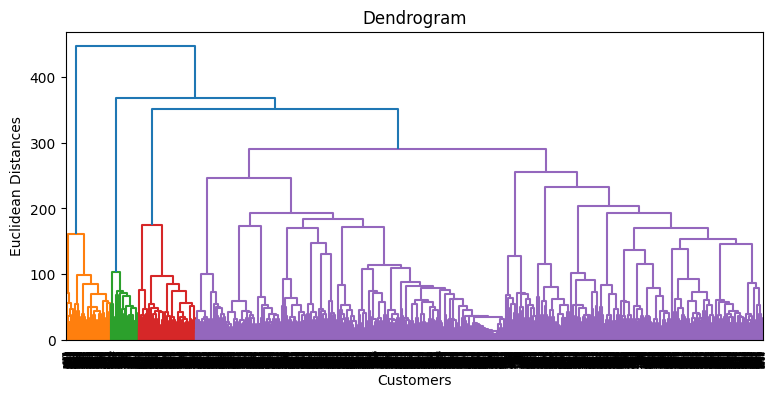

In [ ]:
plt.figure(figsize = (9, 4))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_final, method = 'ward'))#sch.dendrogram plots , sch.linkage to create links and method ward defines how the linkage will be created.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

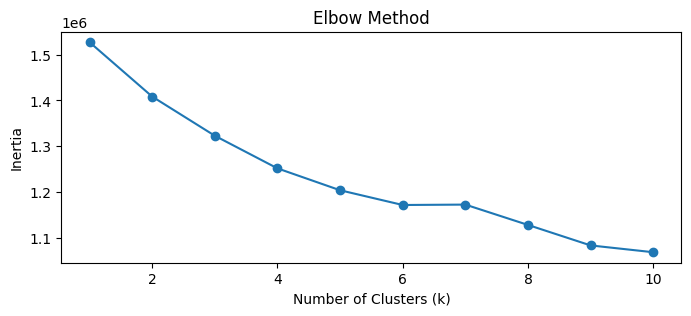

For n_clusters=2, the silhouette score is 0.1628
For n_clusters=3, the silhouette score is 0.1295
For n_clusters=4, the silhouette score is 0.1420
For n_clusters=5, the silhouette score is 0.1309
For n_clusters=6, the silhouette score is 0.1106
For n_clusters=7, the silhouette score is 0.1011


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#using the Elbow Method with KMeans clustering to find the optimal number of clusters k.

k_range = range(1, 11)
# preparing a list to store inertia values — which tell us how well the data is grouped for each number of clusters.
inertia_values = []

for k in k_range:
    model = KMeans(n_clusters = k)#train
    model.fit(X_final)#fit
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


range_n_clusters = range(2, 8)

for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(X_final)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_final, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg:.4f}")


# ML Model - 1  (AgglomerativeClustering)

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,linkage = 'ward')# It is a bottom up clus. method.
y_hc = hc.fit_predict(X_final)#train # y_hc is a array of label showing which data will group to which clust.

In [ ]:
y_hc

array([1, 1, 2, ..., 0, 0, 0])

In [ ]:
final_df = final_df.drop(columns=['CustomerID'], errors='ignore')

final_df['aglo_label'] = y_hc
final_df.head()

,10,11,12,120cm,125g,15,15c,15cm,16x16cm,17080,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,TotalPrice,aglo_label,kmeans_label
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,3314.73,1,2
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,90.20,1,2
2,0.046878,0.0,0.061114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,999.15,1,1
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,294.40,1,0
4,0.000000,0.0,0.047301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,1130.94,1,0


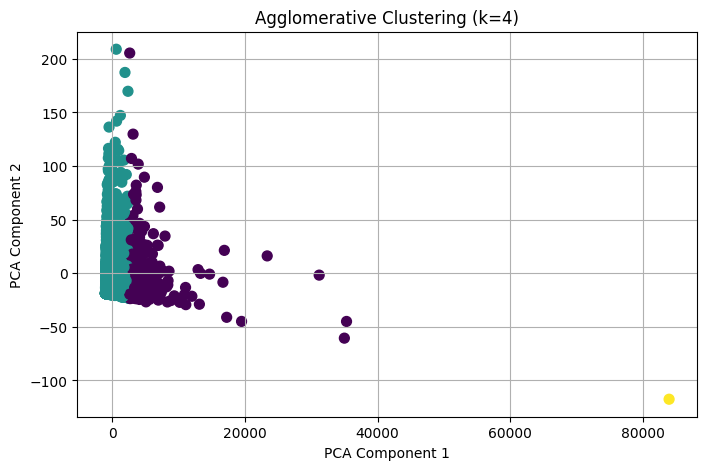

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform Agglomerative Clustering with 4 clusters
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg = agg.fit_predict(X_final)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_final)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_agg, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (k=4)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [ ]:
print("Agglomerative Silhouette:", silhouette_score(X_final, labels_agg))

Agglomerative Silhouette: 0.8286083501957708


##1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### Agglomerative Clustering :
It is a type of hierarchical clustering where each data point starts as its own cluster, and the algorithm repeatedly merges the closest pairs of clusters until the desired number of clusters is reached.

- Linkage: 'ward' (minimizes the variance of the clusters being merged)

- Number of clusters (k): 4

- Data Preprocessing: All numeric features were scaled using RobustScaler to handle outliers, and dimensionality was reduced with PCA (for visualization only).




## Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


- The Silhouette Score = 0.8286, which is very high, indicates that the clusters are dense and well-separated.

##2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### Silhouette Score
- Definition:
The silhouette score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1.

### Impact on Business:
- A high silhouette score (e.g., 0.83 for Agglomerative,) means the segments are clearly defined, indicating:

- Better customer targeting

- Personalized marketing strategies

- Optimized resource allocation

- Improved customer satisfaction and retention



---

# ML Model - 2 (kmeans clustering)

In [ ]:

# Recreate X_final from latest df_final
final_df['kmeans_label'] = y_kmeans
final_df.head()

,10,11,12,120cm,125g,15,15c,15cm,16x16cm,17080,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,TotalPrice,aglo_label,kmeans_label
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,3314.73,1,2
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,90.20,1,0
2,0.046878,0.0,0.061114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,999.15,1,0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,294.40,1,0
4,0.000000,0.0,0.047301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,1130.94,1,0


In [ ]:
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X_final)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


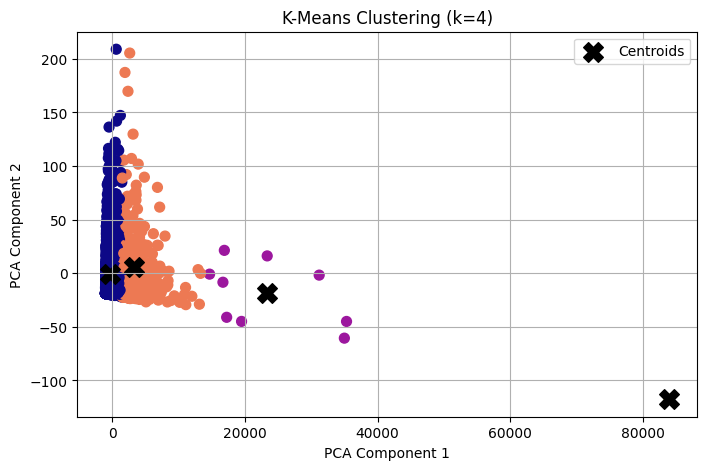

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_final)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_final)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_kmeans, cmap='plasma', s=50)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],
    pca.transform(kmeans.cluster_centers_)[:, 1],
    c='black', marker='X', s=200, label='Centroids'
)
plt.title("K-Means Clustering (k=4)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
print("KMeans Silhouette:", silhouette_score(X_final, labels_kmeans))
print("Agglomerative Silhouette:", silhouette_score(X_final, labels_agg))

KMeans Silhouette: 0.8002957037314586
Agglomerative Silhouette: 0.8286083501957708


## 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### K-Means Clustering :
K-Means is an unsupervised machine learning algorithm that partitions data into K clusters, where each point belongs to the cluster with the nearest mean (centroid). The goal is to minimize intra-cluster distance and maximize inter-cluster distance.

In this case:

- Model: K-Means

- Number of Clusters: 4

- Random State: 42 (for reproducibility)

- Evaluation Metric: Silhouette Score
Silhouette Score for K-Means: 0.8003

## 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### Silhouette Score
- Definition:
The silhouette score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1.


---

#.


---

#Final Verdicts


## 1. Which Evaluation metrics did you consider for a positive business impact and why?

### Silhouette Score :
 It measures how well each data point fits within its assigned cluster, compared to other clusters.
It ranges from -1 to +1:
### Impact on Business:
- A high silhouette score ( e.g., 0.83 for Agglomerative and 0.80 for K-Means) means the segments are clearly defined, indicating:

- Better customer targeting

- Personalized marketing strategies

- Optimized resource allocation

- Improved customer satisfaction and retention




## 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

In [ ]:
from sklearn.metrics import silhouette_score
X_final = final_df.drop(columns=['kmeans_label', 'aglo_label'])
print("KMeans Silhouette:", silhouette_score(X_final, labels_kmeans))
print("Agglomerative Silhouette:", silhouette_score(X_final, labels_agg))

KMeans Silhouette: 0.8002957037314586
Agglomerative Silhouette: 0.8286083501957708


From the above result:

### Final Model: Agglomerative Clustering
Reasons:

- Higher Silhouette Score (0.8286) → Better-defined clusters.

- Stable results (no random initialization like KMeans).

- Handles high-dimensional data (TF-IDF + numerical features).

- Hierarchical structure → More interpretable for business tiers.

Business Impact:

- Better customer segmentation for targeted marketing.

- Improved ROI through personalized campaigns.

- Helps reduce churn via tailored retention strategies.

- Supports data-driven strategic planning.

## 3. Explain the model which you have used and the feature importance using any model explainability tool?

### Model Used: Agglomerative Clustering

- A hierarchical clustering algorithm.

- Builds clusters by recursively merging the closest pairs of clusters using a distance metric.

- Ward linkage minimizes the variance within each cluster (more compact and meaningful groups).

- Higher Silhouette Score (0.8286) → Better-defined clusters.

- Stable results (no random initialization like KMeans).


In [ ]:
# To get PCA loadings
pca = PCA(n_components=2)
pca.fit(X_final)
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=X_final.columns)
loadings.sort_values(by='PC1', ascending=False).head()


,PC1,PC2
TotalPrice,0.999999,-0.001266
OrderFrequency,0.001266,0.999991
bag,0.000014,0.000809
lunch,0.000009,0.000558
red,0.000008,0.000651


PC1 (Spend Axis): Explains variation in customer spending — higher PC1 means higher TotalPrice.

PC2 (Frequency Axis): Explains how often customers place orders.

TF-IDF words (like bag, lunch, red) have negligible impact on clustering in these components.

---

# **Conclusion**

### ✅ **Conclusion of the Clustering Model Analysis**

1. **Best Model Chosen**:
   ✅ **Agglomerative Clustering** was selected as the final model due to its **higher Silhouette Score (0.8286)** compared to KMeans (0.8003), indicating **better-defined and well-separated clusters**.

2. **Feature Importance (via PCA)**:

   * **TotalPrice** and **OrderFrequency** are the **most influential features**, as seen from PCA loadings.
   * These features help distinguish customer segments based on **spending capacity and purchase behavior**.
   * TF-IDF-based features (like specific product words) had negligible impact on the main clustering axes.

3. **Business Insight**:

   * The model identifies **distinct customer segments**, such as:

     * High spenders
     * Frequent buyers
     * Low-frequency, low-value customers
   * This enables the business to:

     * Design **targeted marketing strategies**
     * Offer **personalized promotions**
     * Improve **customer retention and upselling**

4. **Positive Business Impact**:

   * The clustering solution drives **data-driven customer segmentation**, allowing for:

     * Better **resource allocation**
     * Higher **ROI on marketing**
     * Enhanced **customer satisfaction** through personalization

---

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

---